In [1]:
# Setup

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Dataframe of csv for the avgs of the positively keyed and negatively keyed anxiety scores
df_AVGPosNeg = pd.read_csv(r'C:\Users\jatteberry\Downloads\PSFGripChestAVGPosNeg.csv')

# Dataframe of csv for all columns
df_All = pd.read_csv(r'C:\Users\jatteberry\Downloads\PSFALL.csv')

In [2]:
df_AVGPosNeg

,age,grip,chest,AVGPositivelyKeyed,AVGNegativelyKeyed
0,19,58,60.0,3.8,4.6
1,21,57,67.0,3.2,4.2
2,18,38,12.0,4.6,4.0
3,21,52,31.0,6.0,3.8
4,19,53,52.0,3.0,4.6
...,...,...,...,...,...
169,18,32,23.0,2.6,4.8
170,18,19,9.0,4.4,3.8
171,19,16,8.0,2.0,2.8
172,18,30,14.0,6.0,2.6


In [3]:
# Looks as though 49th row has a NA value

df_AVGPosNeg = df_AVGPosNeg.dropna()

In [4]:
# Check data types

df_AVGPosNeg.dtypes

age                     int64
grip                    int64
chest                 float64
AVGPositivelyKeyed    float64
AVGNegativelyKeyed    float64
dtype: object

In [5]:
# Change chest to int64

df_AVGPosNeg['chest'] = df_AVGPosNeg['chest'].astype('int64')

C:\Users\jatteberry\AppData\Local\Temp\ipykernel_1684\2007988953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AVGPosNeg['chest'] = df_AVGPosNeg['chest'].astype('int64')


In [6]:
# Get setting with copy warning but Chest is now int64

df_AVGPosNeg

,age,grip,chest,AVGPositivelyKeyed,AVGNegativelyKeyed
0,19,58,60,3.8,4.6
1,21,57,67,3.2,4.2
2,18,38,12,4.6,4.0
3,21,52,31,6.0,3.8
4,19,53,52,3.0,4.6
...,...,...,...,...,...
169,18,32,23,2.6,4.8
170,18,19,9,4.4,3.8
171,19,16,8,2.0,2.8
172,18,30,14,6.0,2.6


[Text(0.5, 1.0, 'Grip Strength vs Chest Strength')]

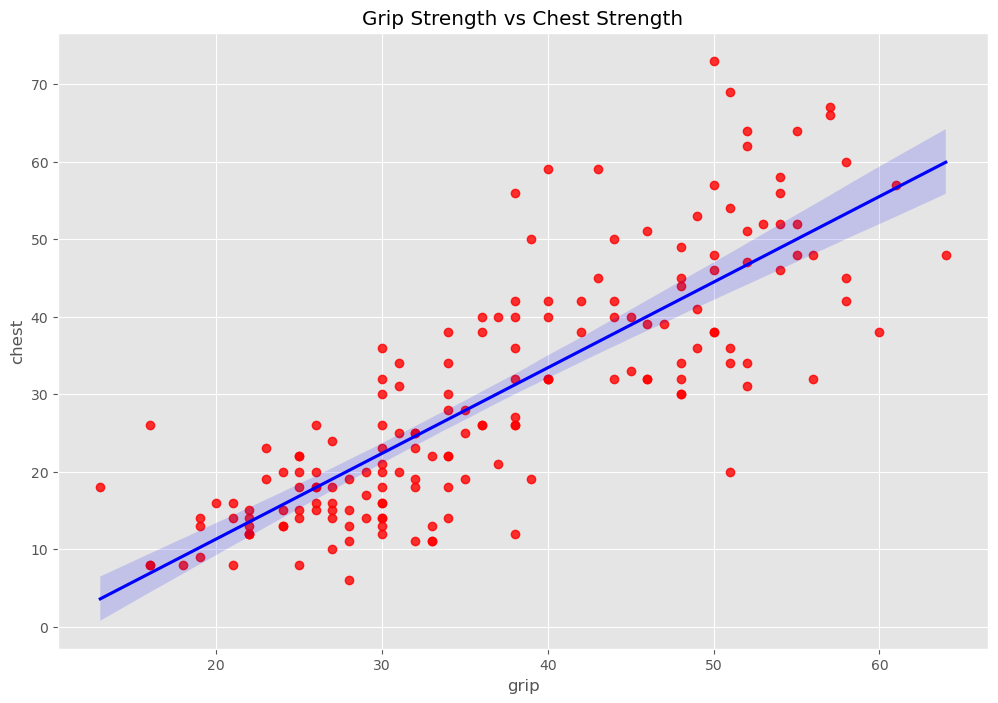

In [7]:
# Correlation scatter plot, with linear regression, of grip strength vs chest strength

sns.regplot(x = 'grip', y = 'chest', data=df_AVGPosNeg, scatter_kws = {'color' : 'red'}, line_kws = {'color' : 'blue'}).set(title = 'Grip Strength vs Chest Strength')

In [8]:
# Correlation between age, grip, chest, and average positively keyed anxiety and negatively keyed

df_AVGPosNeg.corr(method = 'pearson')

,age,grip,chest,AVGPositivelyKeyed,AVGNegativelyKeyed
age,1.000000,0.116250,0.062724,-0.034460,0.001459
grip,0.116250,1.000000,0.817691,-0.225197,0.350433
chest,0.062724,0.817691,1.000000,-0.202692,0.210935
AVGPositivelyKeyed,-0.034460,-0.225197,-0.202692,1.000000,-0.604323
AVGNegativelyKeyed,0.001459,0.350433,0.210935,-0.604323,1.000000


In [9]:
# Consensus for df_AVGPosNeg
#   Looks like there is little correlation between the average pos/neg keyed anxiety scores
#   High correlation between grip strength and chest strength
# Now let's look at all of the scores, not just the averages

In [10]:
# Now looking at df_All

df_All

,age,sex,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,e_anx_6,e_anx_7,e_anx_8,e_anx_9,e_anx_10
0,19,male,White/Euro-American,58,60.0,4,6,5,2,2,4,6,5,6,2
1,21,male,Hispanic/Latino,57,67.0,3,4,3,3,3,4,6,2,5,4
2,18,male,White/Euro-American,38,12.0,3,6,6,6,2,2,2,5,5,6
3,21,male,Biracial/Other,52,31.0,6,6,6,7,5,1,4,3,6,5
4,19,male,White/Euro-American,53,52.0,3,4,3,4,1,3,7,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,18,female,Hispanic/Latino,32,23.0,2,5,2,1,3,4,6,2,6,6
170,18,female,White/Euro-American,19,9.0,5,6,5,2,4,1,6,5,5,2
171,19,female,Hispanic/Latino,16,8.0,5,2,1,1,1,4,2,1,5,2
172,18,female,White/Euro-American,30,14.0,7,6,6,7,4,2,3,2,3,3


In [11]:
# Drop null value in row 49 again

df_All = df_All.dropna()

In [12]:
# Change all Strings to numerics

for col in df_All:
    if(df_All[col].dtype == 'object'):
        df_All[col] = df_All[col].astype('category')
        df_All[col] = df_All[col].cat.codes

C:\Users\jatteberry\AppData\Local\Temp\ipykernel_1684\2013729451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_All[col] = df_All[col].astype('category')
C:\Users\jatteberry\AppData\Local\Temp\ipykernel_1684\2013729451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_All[col] = df_All[col].cat.codes
C:\Users\jatteberry\AppData\Local\Temp\ipykernel_1684\2013729451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [13]:
# Check to see if numeric

df_All

,age,sex,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,e_anx_6,e_anx_7,e_anx_8,e_anx_9,e_anx_10
0,19,1,5,58,60.0,4,6,5,2,2,4,6,5,6,2
1,21,1,3,57,67.0,3,4,3,3,3,4,6,2,5,4
2,18,1,5,38,12.0,3,6,6,6,2,2,2,5,5,6
3,21,1,1,52,31.0,6,6,6,7,5,1,4,3,6,5
4,19,1,5,53,52.0,3,4,3,4,1,3,7,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,18,0,3,32,23.0,2,5,2,1,3,4,6,2,6,6
170,18,0,5,19,9.0,5,6,5,2,4,1,6,5,5,2
171,19,0,3,16,8.0,5,2,1,1,1,4,2,1,5,2
172,18,0,5,30,14.0,7,6,6,7,4,2,3,2,3,3


In [14]:
# Correlation between age, grip, chest, and all scored anxiety

df_All.corr(method = 'pearson')

,age,sex,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,e_anx_6,e_anx_7,e_anx_8,e_anx_9,e_anx_10
age,1.000000,0.133838,0.137576,0.116250,0.062724,-0.066885,-0.020243,-0.026762,-0.030689,0.020210,-0.071841,-0.047240,0.065471,-0.002219,0.064595
sex,0.133838,1.000000,-0.032062,0.765893,0.758029,-0.101383,-0.086597,-0.111383,-0.039924,-0.257051,0.185039,0.007240,0.211065,0.299000,0.061438
ethnicity,0.137576,-0.032062,1.000000,0.078490,0.040573,-0.021818,-0.025382,-0.093174,-0.110821,-0.064948,-0.058098,0.085183,-0.038602,0.002326,-0.008779
grip,0.116250,0.765893,0.078490,1.000000,0.817691,-0.152687,-0.108579,-0.173236,-0.074784,-0.329269,0.203081,0.125835,0.238536,0.327181,0.210575
chest,0.062724,0.758029,0.040573,0.817691,1.000000,-0.124615,-0.077714,-0.169509,-0.089509,-0.290413,0.141464,-0.020512,0.159983,0.311089,0.090056
e_anx_1,-0.066885,-0.101383,-0.021818,-0.152687,-0.124615,1.000000,0.427769,0.423243,0.357136,0.403464,-0.359045,-0.187755,-0.169475,-0.282276,-0.348040
e_anx_2,-0.020243,-0.086597,-0.025382,-0.108579,-0.077714,0.427769,1.000000,0.518690,0.398200,0.451311,-0.550650,-0.255401,-0.035812,-0.150788,-0.323248
e_anx_3,-0.026762,-0.111383,-0.093174,-0.173236,-0.169509,0.423243,0.518690,1.000000,0.414222,0.578926,-0.513142,-0.352441,-0.203910,-0.437030,-0.324757
e_anx_4,-0.030689,-0.039924,-0.110821,-0.074784,-0.089509,0.357136,0.398200,0.414222,1.000000,0.343088,-0.263200,-0.165528,-0.053398,-0.209393,-0.184092
e_anx_5,0.020210,-0.257051,-0.064948,-0.329269,-0.290413,0.403464,0.451311,0.578926,0.343088,1.000000,-0.353218,-0.227010,-0.228349,-0.505245,-0.274015


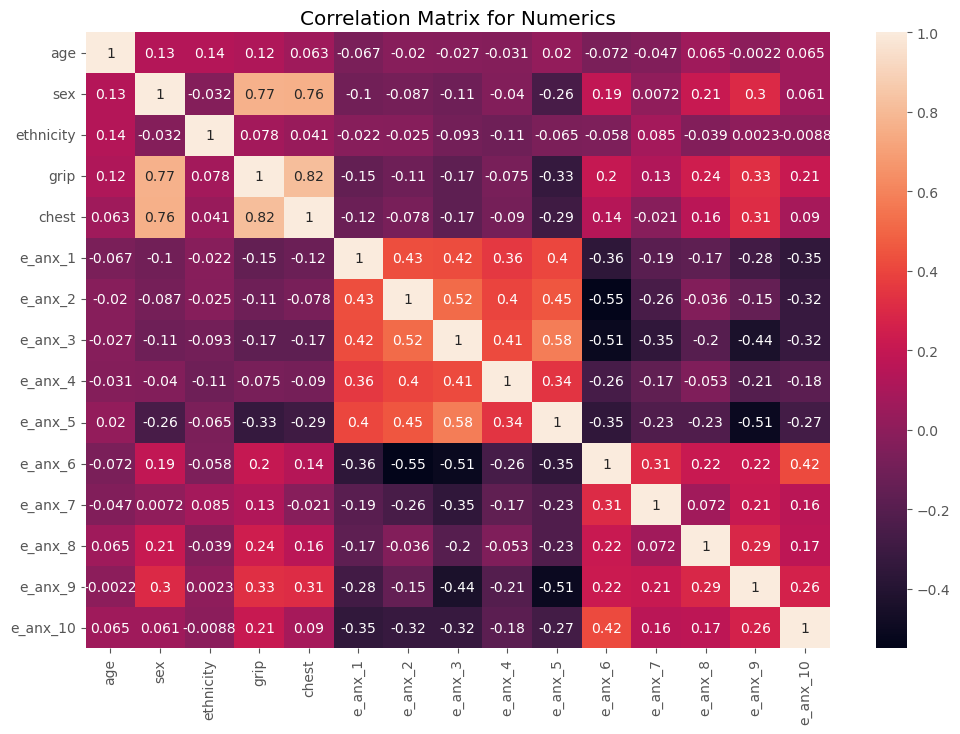

In [15]:
# Visualization for correlation between all columns

corr_matrix = df_All.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numerics')

plt.show()

In [16]:
# Unstacking

corr_matrix = df_All.corr()
corr_pairs = corr_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.3]

high_corr

e_anx_7    e_anx_6      0.306374
e_anx_6    e_anx_7      0.306374
e_anx_9    chest        0.311089
chest      e_anx_9      0.311089
e_anx_9    grip         0.327181
grip       e_anx_9      0.327181
e_anx_5    e_anx_4      0.343088
e_anx_4    e_anx_5      0.343088
           e_anx_1      0.357136
e_anx_1    e_anx_4      0.357136
e_anx_2    e_anx_4      0.398200
e_anx_4    e_anx_2      0.398200
e_anx_5    e_anx_1      0.403464
e_anx_1    e_anx_5      0.403464
e_anx_4    e_anx_3      0.414222
e_anx_3    e_anx_4      0.414222
e_anx_10   e_anx_6      0.417538
e_anx_6    e_anx_10     0.417538
e_anx_3    e_anx_1      0.423243
e_anx_1    e_anx_3      0.423243
           e_anx_2      0.427769
e_anx_2    e_anx_1      0.427769
           e_anx_5      0.451311
e_anx_5    e_anx_2      0.451311
e_anx_3    e_anx_2      0.518690
e_anx_2    e_anx_3      0.518690
e_anx_3    e_anx_5      0.578926
e_anx_5    e_anx_3      0.578926
chest      sex          0.758029
sex        chest        0.758029
          

In [17]:
# Consensus for df_All
#  High correlation between:
#   grip and chest strength
#   sex and grip/chest strength 
#  Decent correlation (0.3 to 0.6) between:
#   all positively keyed anxiety scores
#  Low to mid correlation (0.1 to 0.4) between:
#   all negatively keyed anxiety scores